In this notebook, we will train an MLP to classify images from the MNIST database.

In [30]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


Define Variables

In [31]:

batch_size = 100
D_in, H1, H2, D_out = 784, 12, 12, 10
learning_rate = 0.001
epoch = 50

Load Dataset

In [32]:
# load Mnist dataset
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

train_tensors = mnist_trainset.data.float() / 255
test_tensors = mnist_testset.data.float() / 255

train_dataset = torch.utils.data.TensorDataset(train_tensors, mnist_trainset.targets)
test_dataset = torch.utils.data.TensorDataset(test_tensors, mnist_testset.targets)

train_loader = torch.utils.data.DataLoader(dataset=mnist_trainset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=mnist_testset, batch_size=batch_size, shuffle=False)


Define the Network Architecture


In [33]:

class TreeLayerNeuralNet(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super(TreeLayerNeuralNet, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
        self.sigmoid = nn.Sigmoid()
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, x):
        h1 = self.linear1(x)
        h1sig = self.sigmoid(h1)
        h2 = self.linear2(h1sig)
        h2sig = self.sigmoid(h2)
        y = self.linear3(h2sig)
        y_pred = self.softmax(y)
        return y_pred




Specify Loss Function and Optimizer

In [34]:
model = TreeLayerNeuralNet(D_in, H1, H2, D_out)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Train the Network

Epoch 1/50 , loss= 2.220326747894287
Epoch 2/50 , loss= 2.028090916077296
Epoch 3/50 , loss= 1.878633253375689
Epoch 4/50 , loss= 1.779362187186877
Epoch 5/50 , loss= 1.7249396298329036
Epoch 6/50 , loss= 1.7087625362475714
Epoch 7/50 , loss= 1.7009851839145025
Epoch 8/50 , loss= 1.6959780659278234
Epoch 9/50 , loss= 1.6691684031486511
Epoch 10/50 , loss= 1.640938741763433
Epoch 11/50 , loss= 1.6308678126335143
Epoch 12/50 , loss= 1.6250376512606939
Epoch 13/50 , loss= 1.6208848746617635
Epoch 14/50 , loss= 1.57701953291893
Epoch 15/50 , loss= 1.5500222168366113
Epoch 16/50 , loss= 1.542780437072118
Epoch 17/50 , loss= 1.5382376889387765
Epoch 18/50 , loss= 1.5348470910390217
Epoch 19/50 , loss= 1.5321246951818466
Epoch 20/50 , loss= 1.5299585938453675
Epoch 21/50 , loss= 1.528284914890925
Epoch 22/50 , loss= 1.5266417143742244
Epoch 23/50 , loss= 1.5251735001802444
Epoch 24/50 , loss= 1.5238152933120728
Epoch 25/50 , loss= 1.5226354718208313
Epoch 26/50 , loss= 1.5219316033522288
Epoc

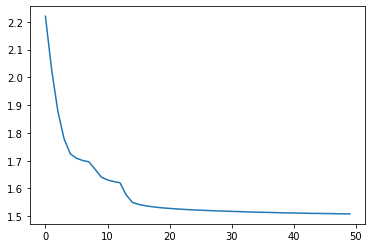

In [35]:
total_loss = []
addloss = 0
lossarray = np.zeros(epoch)
prit_show = 100
for epochnumber in range(epoch):
    addloss = 0
    for i, (imges, labeles) in enumerate(train_loader):
        y_predicted = model(imges.reshape(-1, 28 * 28))
        loss = F.cross_entropy(y_predicted, labeles)
        loss.backward()
        addloss += loss.item()
        optimizer.step()
        optimizer.zero_grad()
    lossarray[epochnumber] = addloss / len(train_loader)
    print('Epoch {}/{} , loss= {}'.format(epochnumber + 1, epoch,lossarray[epochnumber] ))
plt.plot(range(epoch), lossarray)
plt.show()


Test the Trained Network

In [36]:
with torch.no_grad():
    total = 0
    correct = 0
    for i, (imges, labeles) in enumerate(test_loader):
        outputs = model(imges.reshape(-1, 28 * 28))
        _, predicted = torch.max(outputs.data, 1)
        total += labeles.size(0)
        correct += (predicted == labeles).sum().item()
        accuracy = correct / total

    print('accuracy{}'.format(accuracy))

accuracy0.9341
